# **Tarefa \#2**: Machine Learning MC886/MO444
##**Regressão Linear**##

Universidade Estadual de Campinas (Unicamp)

Instituto de Computação (IC)

Prof. Marcelo Reis



In [ ]:
# TODO: RA & Name 
print('RA1: 220102 ' + 'André Luiz do Canto Portela')
print('RA2: 183298 ' + 'Marcelo Aparecido Moreira')

RA1: 220102 André Luiz do Canto Portela
RA2: 183298 Marcelo Aparecido Moreira


## Objective: Predict life expectancy. 

Explore **linear regression** alternatives and come up with the best possible model to the problems, avoiding overfitting. In particular, predict the **Life expectancy** from their attributes.

## Dataset

The purpose of this dataset is to do health data analysis. The dataset related to life expectancy, health factors for 193 countries was collected from the same WHO data repository website and their corresponding economic data were collected from the United Nations website. Among all categories of health-related factors, only the critical factors that are most representative were chosen. All predictor variables were then divided into several broad categories: Immunization-related factors, Mortality factors, Economic factors, and Social factors.

Dataset Information: You should respect the following traininig/test split: 2056 training examples, and 882 test examples.

There are 22 attributes as follows: 

Data Dictionary

- Country	
- Year	
- Status		
- Adult Mortality	
- infant deaths	
- Alcohol	
- percentage expenditure	
- Hepatitis B	
- Measles	
- BMI	
- under-five deaths	
- Polio	
- Total 
- expenditure	
- Diphtheria	
- HIV/AIDS	
- GDP	
- Population	
- thinness  1-19 years	
- thinness 5-9 years	
- Income composition of resources	Schooling

- **Life expectancy**


The data is available at
- train: https://tinyurl.com/5374623f
- test: https://tinyurl.com/mtdkjf55


## Atividades

1. (5 pontos) Faça a Regressão Linear. Você deve implementar a sua própria solução e comparar com ```sklearn.linear_model.SGDRegressor``` (modelo linear calculado com gradiente descendente estocástico da biblioteca [scikit-learn](http://scikit-learn.org)).
Não esqueça que o conjunto de testes NÃO deve ser utilizado para o **treinamento** do modelo.

**Dica: Verifique o conjunto de dados. Existem outliers? Estão faltando valores em alguns campos? Como utilizar variáveis categóricas?**


In [ ]:
# Importação de bibliotecas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn import preprocessing
import seaborn as sns
%matplotlib inline

## **I) Pré-processamento dos dados**

Primeiramente, faremos um tratamento das bases de dados, preparando-as para a utilização nos algoritmos. Essa é uma etapa crucial do *pipeline* de aprendizado de máquina, pois irá refletir diretamente nos resultados que visamos obter. Um tratamento adequado dos nossos datasets irá ditar a performance dos algoritmos, facilitando, por exemplo, a convergência. Além disso, tende a fazer com que a nossa hipótese (a princípio, um modelo linear), caso explique razoavelmente bem o problema, consiga uma melhor aderência aos dados, evitando transtornos como *underfiting* durante o treinamento.  


Queremos, ao fim do tratamento, agrupar os dados nos conjuntos da célula abaixo, que por enquanto serão inicializados como nulos.

In [ ]:
# TODO: Separe o conjunto de dados em treino (X_train, y_train) e teste (X_test, y_test).
#       Faça o pré-processamento dos dados: Normalização, limpeza de dados, variáveis categóricas
#       Substitua o conjunto de dados nas variáveis abaixo

X_train = None
y_train = None
X_test = None
y_test = None

O primeiro passo é fazer a leitura dos datasets, que estão armazenados em planilhas do *Google Sheets*. Eles serão copiados para dataframes do *pandas*.

In [ ]:
# Leitura das bases de dados

training_sheet_id = "1ejB4RtHX6ma0XK51I6f_7AtDblKivlOtzSkxitdZYtA" 
testing_sheet_id = "1PrY9blDscKw5gWTyA3S34Gj3H5rRpuUU_b9rhVFsPQc"

url = "https://docs.google.com/spreadsheets/d/{}/gviz/tq?tqx=out:csv" 

training_df = pd.read_csv(url.format(training_sheet_id)) # conjunto de treinamento
testing_df = pd.read_csv(url.format(testing_sheet_id)) # conjunto de teste


Vamos verificar as dimensões desses datasets.

In [ ]:
# Shape dos datasets de treino e teste

initial_training_df_shape = training_df.shape
initial_testing_df_shape = testing_df.shape

(
  'Dataset de treino inicial',
  initial_training_df_shape,
  'Dataset de teste inicial',
  initial_testing_df_shape
)

('Dataset de treino inicial',
 (2056, 22),
 'Dataset de teste inicial',
 (882, 22))

Temos, inicialmente, 2056 *samples* no dataset de treino e 882 no dataset de teste.
O número de colunas é 22, onde 21 são *features* e 1 é a variável dependente que deverá ser predita.

Visualizemos os datasets para ter insights sobre algumas variáveis:

*   Formatos
*   Dados faltantes (*missing values*)
*   Variáveis categóricas e quantitativas
*   Etc



In [ ]:
training_df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Malta,2008,Developed,80.0,64.0,0,7.14,2.655.573.684,86.0,1,...,72.0,8.15,72.0,0.1,21.928.767,49379.0,NaN,NaN,813.00,14.6
1,Congo,2005,Developing,55.3,394.0,8,2.03,0,NaN,146,...,62.0,2.42,62.0,5.9,NaN,NaN,8.8,8.5,496.00,9.4
2,Burkina Faso,2009,Developing,56.9,283.0,44,4.55,8.114.304.705,92.0,54118,...,91.0,7.41,92.0,1.1,5.527.455.521,1514199.0,9.3,8.8,356.00,5.9
3,Guinea-Bissau,2011,Developing,57.1,289.0,4,3.57,4.045.367.358,86.0,0,...,85.0,5.46,86.0,5.7,69.269.989,1596154.0,7.8,7.7,0.41,NaN
4,Myanmar,2007,Developing,64.5,217.0,58,0.26,5.305.728,85.0,1088,...,84.0,1.68,86.0,0.6,41.451,49171586.0,13.2,13.5,484.00,8.1


In [ ]:
testing_df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Syrian Arab Republic,2006,Developing,73.7,123.0,8,0.97,1.226.523.334,83.0,517,...,83.0,3.78,8.0,0.1,176.224.617,18914977.0,6.4,6.3,636.00,11.4
1,Croatia,2006,Developed,75.9,113.0,0,11.83,1.555.651.986,NaN,1,...,96.0,6.95,96.0,0.1,1.136.341.845,444.0,1.8,1.8,783.00,13.9
2,Montenegro,2007,Developing,74.2,125.0,0,4.98,6.785.188.944,9.0,0,...,92.0,6.74,92.0,0.1,5.957.145.693,615875.0,2.1,2.2,762.00,13.6
3,Bahrain,2014,Developing,76.8,7.0,0,1.57,3.672.556.742,98.0,46,...,98.0,4.98,98.0,0.1,249.833.792,NaN,6.1,NaN,0.82,14.5
4,Kenya,2000,Developing,51.9,428.0,77,1.51,681.685.555,NaN,21002,...,8.0,4.68,82.0,18.1,439.797.132,3145483.0,9.2,9.1,448.00,8.4


Observando os cabeçalhos acima é possível verificar que, aparentemente, as colunas **percentage expenditure** e **Total expenditure** estão trocadas, pois semanticamente espera-se que **Total expenditure** represente o valor monetário total de uma variável específica do país (como US$2,655,573,684.00, por exemplo) e **percentage expenditure** represente um valor percentual relativo (como 8.15%). Apesar disso, manteremos os títulos originais das colunas, uma vez que isso não afetará os modelos de aprendizado que trabalharemos nesta tarefa.

Em ambos os datasets apareceram samples (linhas) com datapoints vazios (NaN). Então, é conveniente examinar a quantidade desses samples para determinar se é viável uma simples remoção de todas as linhas que apresentam missing values, ou se é necessário um tratamento mais elaborado.

In [ ]:
# Verificação de linhas com missing values

training_df_shape = training_df.shape
nan_analysis_training_df_shape = training_df.dropna().shape

testing_df_shape = testing_df.shape
nan_analysis_testing_df_shape = testing_df.dropna().shape

print(f'O data frame de treinamento possui {training_df_shape[0]} linhas, \
mas apenas {nan_analysis_training_df_shape[0]} delas possuem dados em todas \
as colunas.')

print(f'O data frame de teste possui {testing_df_shape[0]} linhas, \
mas apenas {nan_analysis_testing_df_shape[0]} delas possuem dados em todas \
as colunas.')

O data frame de treinamento possui 2056 linhas, mas apenas 749 delas possuem dados em todas as colunas.
O data frame de teste possui 882 linhas, mas apenas 314 delas possuem dados em todas as colunas.


Simplesmente remover linhas com missing values reduziria muito os **N**'s de treinamento e de teste, portanto não é uma opção.

Vamos identificar se existem linhas que não possuem valores para a coluna **Life expectancy**, e em seguida **removê-las**. Como esta é a coluna cujos valores queremos prever, ela necessariamente precisa posssuir um valor válido para cada datapoint, já que não faz sentido prever um valor inexistente ou inválido. Lembremos que estamos trabalhando com um problema supervisionado, portanto todos os samples precisam ter suas respectivas *labels* anotadas.

In [ ]:
# Verificação de linhas vazias para a coluna 'Life expectancy'

n_training_rows_without_life_expectancy = training_df['Life expectancy'].isna().sum() # verificação no conjunto de treinamento
n_testing_rows_without_life_expectancy = testing_df['Life expectancy'].isna().sum() # verificação no conjunto de teste
f"{n_training_rows_without_life_expectancy}"
f'''\
Os datasets de treino e de teste possuem respectivamente \
{n_training_rows_without_life_expectancy} e {n_testing_rows_without_life_expectancy} \
linhas que não possuem valores para a variável Life expectancy e que serão removidas.\
'''

'Os datasets de treino e de teste possuem respectivamente 6 e 4 linhas que não possuem valores para a variável Life expectancy e que serão removidas.'

É possível perceber que colunas como **Country** e **Status** são realmente variáveis categóricas e devem ser tratadas como tal, mas **percentage expenditure** e **GDP** são variáveis quantitativas que estão num formato muito específico de *string*, o que exige um tratamento mais detalhado.

In [ ]:
# Verificação de features que não apresentam valores numéricos

non_numeric_training_df = training_df.select_dtypes(exclude = 'number')
non_numeric_training_df.head()

,Country,Status,percentage expenditure,GDP
0,Malta,Developed,2.655.573.684,21.928.767
1,Congo,Developing,0,NaN
2,Burkina Faso,Developing,8.114.304.705,5.527.455.521
3,Guinea-Bissau,Developing,4.045.367.358,69.269.989
4,Myanmar,Developing,5.305.728,41.451


In [ ]:
# Análise da feature 'Country'

(
  country_names, number_of_countries
) = training_df['Country'].unique(), len(training_df['Country'].unique())
(
  country_names, f'Total of {number_of_countries} countries'
)

(array(['Malta', 'Congo', 'Burkina Faso', 'Guinea-Bissau', 'Myanmar',
        'Libya', 'Canada', 'Micronesia (Federated States of)',
        'Bosnia and Herzegovina', 'Botswana', 'Solomon Islands',
        'Dominican Republic', 'Singapore', 'Bhutan', 'Haiti', 'Kiribati',
        'Grenada', 'Malawi', 'Philippines', 'Maldives', 'Barbados',
        'Ghana', 'Cabo Verde', 'Kazakhstan', 'Nicaragua', 'Argentina',
        'Kyrgyzstan', 'Equatorial Guinea', 'Swaziland', 'Belize', 'Peru',
        'Uzbekistan', 'Saint Lucia', 'Burundi', 'Cambodia', 'Comoros',
        'Oman', 'Turkmenistan', 'Finland', 'Slovakia', 'Tonga',
        'South Sudan', 'Vanuatu', 'Croatia', 'Poland', 'Zambia', 'Jamaica',
        'El Salvador', 'Turkey', 'Zimbabwe', 'Japan', 'Benin', 'Ireland',
        'Lithuania', 'The former Yugoslav republic of Macedonia',
        'Mauritius', 'Albania', 'Namibia', 'Mozambique', 'Mauritania',
        'Lesotho', 'Madagascar', 'Guyana', 'Panama', 'Djibouti', 'Gambia',
        'Romania',

A feature **Country** será excluída dos datasets por ter um custo/benefício ruim para o modelo: como é uma variável categórica não-ordenável, deveria ser pré-processada com one-hot-enconding, mas isso aumentaria a dimensionalidade do dataset em quase 200 colunas que agregam pouco valor para o modelo.

In [ ]:
# Análise da feature 'Status'

training_df["Status"].unique(), testing_df["Status"].unique()

(array(['Developed', 'Developing'], dtype=object),
 array(['Developing', 'Developed'], dtype=object))

A variável **Status**, por outro lado, aumenta a dimensionalidade dos datasets em apenas uma coluna e mantém um bom custo/benefício para o modelo.

Como a coluna possui categorias que estão presentes em ambos os datasets, será conveniente usar a função **get_dummies** do pandas para implementar a técnica de one-hot-enconding nessa variável.

As variáveis **GDP** e **percentage expenditure** foram identificadas como não-numéricas, apesar de visualmente parecerem números. Para entender melhor, vale a pena identificar os tipos de dados que estas colunas estão utilizando.

In [ ]:
non_numeric_training_df.head(1)["percentage expenditure"]

0    2.655.573.684
Name: percentage expenditure, dtype: object

In [ ]:
non_numeric_training_df.head(1)["GDP"]

0    21.928.767
Name: GDP, dtype: object

Como mostrado quando [analisamos variáveis não-numéricas](#scrollTo=MJJOdP0FIkoo) no dataset de treinamento, **GDP** e **percentage expenditure** possuem alguns valores NaN e um formato específico de string (com separador de milhares que utiliza "."), como no exemplo abaixo.


```python
"21.928.767"
```



Portanto, irão requerer um tratamento específico de conversão para que estas colunas passem a comportar variáveis numéricas.

In [ ]:
# Informações gerais sobre os datasets

training_df.info(), testing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2056 entries, 0 to 2055
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2056 non-null   object 
 1   Year                             2056 non-null   int64  
 2   Status                           2056 non-null   object 
 3   Life expectancy                  2050 non-null   float64
 4   Adult Mortality                  2050 non-null   float64
 5   infant deaths                    2056 non-null   int64  
 6   Alcohol                          1920 non-null   float64
 7   percentage expenditure           2056 non-null   object 
 8   Hepatitis B                      1686 non-null   float64
 9   Measles                          2056 non-null   int64  
 10  BMI                              2032 non-null   float64
 11  under-five deaths                2056 non-null   int64  
 12  Polio               

(None, None)

Os [datasets](#scrollTo=oX04jDrFCrVP) possuem diversas células com missing values espalhadas em diferentes colunas, por isso será necessário preencher os dados faltantes com a média das respectivas colunas (existem outros métodos para preencher os valores faltantes, mas escolhemos esse *approach*).

A essa altura, é interessante também procurar pela existência de *outliers*. Uma análise mais detalhada das distribuições dos datapoints para cada feature irá nos revelar que a maior parte delas não respeita uma distribuição conhecida e bem comportada. Não faremos a análise para todas as features, mas verifiquemos a seguir um exemplo.

Iremos comparar duas colunas: **Life expectancy** e **HIV/AIDS**.

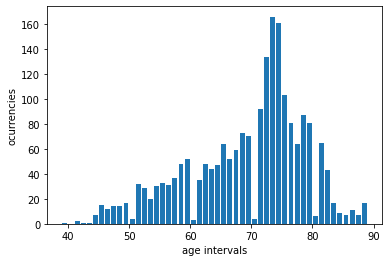

In [ ]:
# Histograma da coluna 'Life expectancy'

plt.hist(training_df['Life expectancy'], bins = 50, rwidth = 0.8)
plt.xlabel('age intervals')
plt.ylabel('ocurrencies')
plt.show()

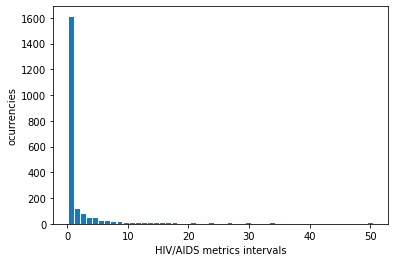

In [ ]:
# Histograma da coluna 'HIV/AIDS'

plt.hist(training_df['HIV/AIDS'], bins = 50, rwidth = 0.8)
plt.xlabel('HIV/AIDS metrics intervals')
plt.ylabel('ocurrencies')
plt.show()

No exemplo acima, é possível notar uma discrepância bastante evidente entre as duas distribuições: enquanto que **Life expectancy** apresenta uma distribuição até que bem comportada (embora não seja uma distribuição normal), vemos algo completamente diferente para **HIV/AIDS**. Isso já é um indício de que identificar outliers nesses conjuntos pode não ser uma tarefa simples.

Seguindo com nosso exemplo, vamos tentar identificar os outliers da feature **HIV/AIDS** utilizando a técnica de *Inter-quartile Range - IQR* (mais detalhes [aqui](https://www.scribbr.com/statistics/interquartile-range/#:~:text=The%20interquartile%20range%20is%20an,ordered%20from%20low%20to%20high.)), já que não temos uma distribuição gaussiana. 

In [ ]:
# Detecção de possíveis outliers

def possible_outliers(df, ft):
  Q1 = df[ft].quantile(0.25)
  Q3 = df[ft].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  list_indexes_outliers = df.index[ (df[ft] < lower_bound) | (df[ft] > upper_bound) ] 

  return list_indexes_outliers # retorna uma lista com candidatos a outliers

In [ ]:
index_list_outliers_candidates = []

for feature in ['HIV/AIDS']:
  index_list_outliers_candidates.extend(possible_outliers(training_df, feature))

print('Nº de possíveis candidatos para outliers da feature HIV/AIDS: {}.'.format(len(index_list_outliers_candidates)))

Nº de possíveis candidatos para outliers da feature HIV/AIDS: 401.


Com a técnica adotada, encontramos um valor de 401 candidatos a outliers. Isso nos mostra que claramente os datapoints encontrados **não** são todos outliers, e proceder de modo a remover os samples a eles associados seria um erro, pois representam uma boa porcentagem do conjunto de treinamento. Substituir os valores pela média da coluna também não seria ideal, sob pena de acochambrar o problema.

Desse modo, não faremos por enquanto nenhuma remoção de candidatos a outliers. Após executar os algoritmos, porém, caso cheguemos a indicadores muito ruins (*loss* e MSE muito altos), podemos fazer uma revisão desta parte de modo a identificar realmente quais são os outliers, utilizando uma técnica mais sofisticada e adaptada para nossos conjuntos de dados.

Por fim, para finalizar essa seção, faremos a seguir a implementação de todas as funções que realizam os tratamentos que discutimos até aqui, com a adição do *scaling* nos conjuntos de treinamento e de teste (não aplicamos o scaling às labels). 

In [ ]:
# Funções que implementam os tratamentos dos dados

y_column_name = "Life expectancy"

def remove_dots_from_str(value):
  """
  Apenas remove os pontos separadores de milhar de uma string
  """
  if type(value) is float:
    return value
  else:
    return value.replace('.', '')

def force_numeric_columns_on_dataset(dataset, column_names):
  """
  Força um tipo numérico para todas as colunas que receber por parâmetro
  com o dataset. Isso é necessário pois simplesmente converter o valor célula de
  uma célula para um tipo numérico não altera o tipo de dados da coluna.
  """
  numeric_dataset = dataset.copy(deep=False)
  converted_dataset_column = None
  for column in column_names:
    converted_dataset_column = numeric_dataset[column].apply(remove_dots_from_str, convert_dtype=True)
    numeric_dataset[column] = pd.to_numeric(converted_dataset_column)
  return numeric_dataset

def clean_dataset(dataset):
  """
  Implementa operações de limpeza de dados em um dataset de acordo com as 
  análises realizadas previamente.
  """
  y_column = [y_column_name]
  irrelevant_columns = ["Country"]
  categorical_columns = ["Status"]
  str_columns_to_numeric = ["GDP", "percentage expenditure"]
  y_cleaned_dataset = dataset.dropna(subset=y_column)
  dataset_without_irrelevant_column = y_cleaned_dataset.drop(columns=irrelevant_columns)
  one_hot_encoded_dataset = pd.get_dummies(dataset_without_irrelevant_column, columns=categorical_columns)
  numeric_dataset = force_numeric_columns_on_dataset(one_hot_encoded_dataset, str_columns_to_numeric)
  numeric_dataset_with_all_values = numeric_dataset.fillna(numeric_dataset.mean())
  return numeric_dataset_with_all_values

def split_x_y_dataset(dataset):
  """
  Particiona um dataset em variáveis independentes e dependentes. O dataframe
  de y possui o nome da coluna para qual será realizada a predição, o dataframe
  de x possui todas as outras colunas.
  """
  x_dataset = dataset.filter(regex=f"^(?!{y_column_name})")
  y_dataset = dataset.filter(regex=y_column_name)
  return x_dataset, y_dataset

def scale_datasets(training_dataset, testing_dataset):
  """
  Realiza o fit nos dados de treino e retorna os datasets de treino e teste
  escalados.
  """
  scaler = preprocessing.MinMaxScaler().fit(training_dataset)
  scaled_training_array = scaler.transform(training_dataset)
  scaled_testing_array = scaler.transform(testing_dataset)
  return scaled_training_array, scaled_testing_array

def clean_split_and_scale_datasets(training_dataset, testing_dataset):
  """
  Função geral de alto-nível que automatiza todo o processo de pré-processamento
  do conjunto de dados de treinamento e teste. Esta função realiza a limpeza dos
  datasets, faz o scaling e separa datasets de X e Y.
  """
  cleaned_training_dataset = clean_dataset(training_dataset)
  cleaned_testing_dataset = clean_dataset(testing_dataset)

  (
    x_cleaned_training_dataset, y_cleaned_training_dataset
  ) = split_x_y_dataset(cleaned_training_dataset)
  
  (
    x_cleaned_testing_dataset, y_cleaned_testing_dataset
  ) = split_x_y_dataset(cleaned_testing_dataset)

  ( # aplicar scaling retorna ndarrays ao invés de dataframes
    x_scaled_training_dataset, x_scaled_testing_dataset
  ) = scale_datasets(x_cleaned_training_dataset, x_cleaned_testing_dataset)

  return (
    x_scaled_training_dataset,
    y_cleaned_training_dataset.to_numpy(),
    x_scaled_testing_dataset,
    y_cleaned_testing_dataset.to_numpy()
  ) #com essa conversão to_numpy(), todas as variáveis ficam no mesmo formato de array


In [ ]:
# Execução do pré-processamento dos dados de treinamento e teste
(
  X_train,
  y_train,
  X_test,
  y_test
) = clean_split_and_scale_datasets(training_df, testing_df)

## **II) Gradiente Descendente Estocástico**

Nesta segunda parte, faremos a implementação do Gradiente Descendente Estocástico (SGD), sem utilizar bibliotecas prontas. Ele é um método otimizado para a resolução do problema de regressão linear e polinomial, sendo uma alternativa para os casos em que a solução analítica do problema é inviável (lembremos que a complexidade do cômputo da pseudo-inversa da matriz *X* de samples é $(O(n^3))$.

Não entraremos nos detalhes de toda a matemática por trás do método, porém faremos uma breve recapitulação.

A **função custo**, que calcula o erro MSE, é dada por:
$$
J(w)= \frac{\sum^{N}_{i = 1}[(\sum^{d}_{j=0}w_{j}x^{(i)}_{j})-y^{(i)}]^2}{N}
$$ onde $w_j$ é a j-ésima entrada do vetor de pesos *w*, $y^{(i)}$ é o valor verdadeiro da i-ésima label, $x^{(i)}_j$ é a j-ésima entrada do i-ésimo vetor/sample, *N* a quantidade de samples do conjunto e *d* o número de features.

Portanto, o gradiente calculado em relação a cada peso fica:
$$
\frac{\partial J(w)}{\partial w_k}=\frac{2̇\sum_{i=1}^{N}[(\sum^{d}_{j=0}w_{j}x^{(i)}_{j})-y^{(i)}]x_k^{(i)}}{N}
$$

com *k* variando no conjunto de índices das features: {*0, 1, ..., d*}.

Porém, no caso do SGD, para cada atualização dos pesos, ao invés de fazer uso de todos os samples no conjunto de dados, é escolhido apenas um de forma aleatória (estamos falando aqui do SGD "clássico", diferente do *mini-batch*). Assim, o gradiente fica:

$$
\frac{\partial J(w)}{\partial w_k}=\frac{2̇[(\sum^{d}_{j=0}w_{j}x_{j})-y]x_k}{1}
$$

Logo, a equação de atualização dos pesos assume a seguinte forma:
$$
w_k ← w_k - \alpha\frac{\partial J(w)}{\partial w_k}
$$ 

onde $\alpha$ é o *learning rate* (taxa de aprendizado).

A seguir, é possível conferir a implementação do SGD.

In [ ]:
# TODO: Implemente aqui sua solução SEM utilizar bibliotecas prontas
#       como scikit-learn, Keras/TensorFlow, ou PyTorch.

from collections import defaultdict

rng = np.random.RandomState(0)

def mse_loss(y_pred, y_true):
  """
  função custo para utilização no SGD
  """
  return (y_pred - y_true)**2

class ErrorHistory:
  """
  ErrorHistory gerencia um dicionário de listas para
  permitir análise do histórico de erros.

  Cada chave do dicionário é uma época e o valor
  de cada chave é uma lista de resultados da função
  custo para a época correspondente. Desta maneira é
  possível analizar tanto o comportamento da função
  custo em determinada época, quanto analizar o erro
  quadrático médio para todas as iterações.
  """
  def __init__(self):
    self._history = defaultdict(list)

  def add(self, epoch, loss_value):
    self._history[epoch].append(loss_value)
  
  def get_all_losses_from_epoch(self, epoch):
    """
    Retorna uma lista com todos os resultados da loss
    para determinada época.
    """
    return self._history[epoch]

  def get_a_mse_list_for_all_epochs(self):
    """
    Retorna uma lista com o erro quadrático médio computado
    para cada época.
    """
    return [
            sum(losses_list)/len(losses_list)
            for _, losses_list in self._history.items()
    ]

  def get_all_losses(self):
    """
    Retorna uma lista com a computação da função loss para todas
    as iterações.
    """
    whole_losses_list = []
    for _, losses_list in self._history.items():
      whole_losses_list += losses_list
    return whole_losses_list

  def calculate_mse(self):
    """
    Calcula o erro quadrático médio para todas as iterações.
    """
    all_losses = self.get_all_losses()
    mse = sum(all_losses)/len(all_losses)
    return mse

  def plot_mse_for_all_epochs(self):
    """
    Plota o erro quadrático médio para cada época, 
    ao longo de todas as épocas.
    """
    mse_list = self.get_a_mse_list_for_all_epochs()
    plt.plot(mse_list)
    plt.title("MSE for all epochs")
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.show()

  def plot_loss_for_epoch(self, epoch):
    """
    Plota o comportamento da função loss para uma época específica.
    """
    loss_list = self.get_all_losses_from_epoch(epoch)
    plt.plot(loss_list)
    plt.title("MSE")
    plt.ylabel('loss')
    plt.xlabel('iteration')
    plt.show()

  def plot_loss(self):
    """
    Plota o comportamento da função loss para todas as iterações.
    """
    loss_list = self.get_all_losses()
    plt.plot(loss_list)
    plt.title("loss function")
    plt.ylabel('loss')
    plt.xlabel('iteration')
    plt.show()

def include_a_column_for_bias(samples):
  """
  Esta função recebe um conjunto de samples (X) e retorna o mesmo conjunto
  com uma coluna adicional preenchida por 1's para acomodar o termo Xo.
  """
  number_of_rows = samples.shape[0]
  column_of_ones = np.ones(number_of_rows)
  resulting_ndarray = np.c_[column_of_ones, samples]
  return resulting_ndarray

def calculate_mse_for_test_predictions(y_test_pred, y_test_real):
  """
  Calcula o mse para predições de teste ao compará-las com os valores reais.
  """
  error_array = y_test_pred - y_test_real
  squared_error_array = error_array**2
  mse_array = sum(squared_error_array)/len(squared_error_array)
  mse = mse_array[0]
  return mse

def plot_loss_for_test(y_test_pred, y_test_real):
  """
  Plota o comportamento da função loss para o conjunto de teste.
  """
  loss_list = []
  for y_pred_item, y_test_item in zip(y_test_pred, y_test_real):
    loss_list.append(mse_loss(y_pred_item, y_test_item))
  plt.plot(loss_list)
  plt.title("loss function for test")
  plt.ylabel('loss')
  plt.xlabel('iteration')
  plt.show()

class SGDRegression():
  def __init__(self, learning_rate, epochs):
    self.epochs = epochs #maximo de iteracoes em épocas
    self.alpha = learning_rate #taxa de aprendizado
    self.ws = None     #pesos
    self.history = ErrorHistory()

  def initialize_ws(self, X):
    if self.ws is None:
      #inicializando pesos aleatorios
      ws = rng.randn(X.shape[1])
      self.ws = ws

  def predict(self, x_sample):
    #use essa função para calcular y a partir de X e ws
    y_predict = np.dot(self.ws, x_sample.T)
    return y_predict

  def update_weights(self, y_pred, target, sample):
    #use essa função para atualizar os pesos
    self.ws = self.ws - ( 2 * self.alpha * (y_pred - target) * sample )

  def fit(self, X, y, verbose=False):
    #use essa função para treinar o modelo
    X = include_a_column_for_bias(X)
    self.initialize_ws(X)
    assert X.shape[0] == y.shape[0]

    # epoch é a época atual das iterações
    for epoch in range(self.epochs):
      # para cada nova época, é feito um 'embaralhamento' dos datasets
      X, y = shuffle(X, y, random_state = 0)
      for index, (sample, target_list) in enumerate(zip(X, y)):
        # index é o índice de determinada predição em determinada época
        y_target = target_list[0]
        y_pred = self.predict(sample)
        loss = mse_loss(y_pred, y_target)
        self.history.add(epoch, loss)
        self.update_weights(y_pred, y_target, sample)
        if verbose == True:
          print(f"epoch {epoch} iteration {index} loss {loss}")

  def test(self, x_test):
    # alterando a dimensionalidade de ws de (row,) para (row,1)
    # para facilitar a multiplicação matricial necessária
    # para realizar a predição de todos os samples de uma vez
    ws_with_1_dimension = np.reshape(self.ws, (self.ws.shape[0], 1))
    x_test_with_bias = include_a_column_for_bias(x_test)

    y_test_pred_array = np.dot(x_test_with_bias, ws_with_1_dimension)
    
    self.y_test_pred_array = y_test_pred_array
    return y_test_pred_array


A seguir, fazemos a execução do algoritmo com um número de épocas = 30 e uma taxa de aprendizado = 0.001.

In [ ]:
lr = 0.001 #substitua por uma taxa de aprendizado válida
epochs = 30 #substitua por um número máximo de iterações válido
sgd_linear = SGDRegression(learning_rate=lr, epochs=epochs)
sgd_linear.fit(X_train, y_train) #treinamento
print('W = ', sgd_linear.ws)

W =  [ 36.60341894   1.04645738 -15.46254842   1.34286413   1.06950062
   0.87430069  -0.91458778  -1.5241651    5.71348449  -1.02659462
   3.3815407    1.75155931   4.26951061 -17.91988637   0.11326246
   0.63389519   0.73153102   0.72289427   3.14773274  16.57208315
  17.41132932  15.52866605]


In [ ]:
#Evolução da loss ao longo do tempo
sgd_linear_history = sgd_linear.history

O valor do erro MSE para o conjunto de treinamento foi de 32.45960477090004


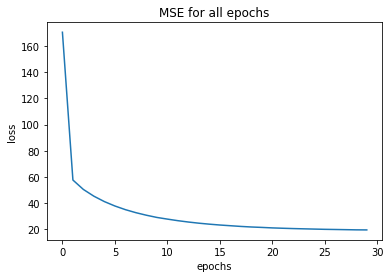

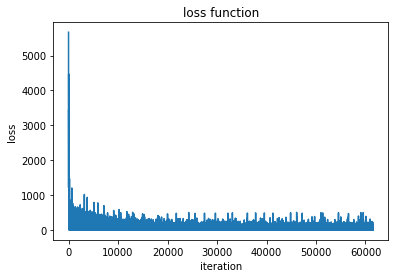

In [ ]:
print(f"O valor do erro MSE para o conjunto de treinamento foi de {sgd_linear_history.calculate_mse()}")
sgd_linear_history.plot_mse_for_all_epochs()
sgd_linear_history.plot_loss()

In [ ]:
#Calcule o MSE no conjunto de testes

y_test_pred = sgd_linear.test(X_test)
mse_for_test = calculate_mse_for_test_predictions(y_test_pred, y_test)
print(f"O erro MSE para o conjunto de testes foi de {mse_for_test}")

O erro MSE para o conjunto de testes foi de 18.037784780323637


## **III) Gradiente Descendente Estocástico (via bibliotecas prontas do *Scikit-Learn*)**

Faremos agora a implementação do SGD utilizando bibliotecas prontas.

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

# TODO: Faça a regressão linear com sklearn.

#Criando o regressor
sklearn_sgd_reg = SGDRegressor(max_iter = 30, tol = 1e-3, shuffle = True, verbose = 0)
#treinamento
sklearn_sgd_reg.fit(X_train, np.hstack(y_train))
score = sklearn_sgd_reg.score(X_train, np.hstack(y_train))
print("R-squared:", score)

R-squared: 0.7204116469438617


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1507: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


sklearn MSE:  22.146334851037544
sklearn RMSE:  4.705989253179139
sklearn W =  [  1.85070143 -10.16210009   0.50440605   2.6219936    1.67436295
   1.64254501  -0.01714059   8.4757474    0.27413341   4.96939657
   3.31855455   4.67123096 -10.94264007   0.84054176   0.48846476
   1.97472408   2.6383879    5.33193056  14.69695053  15.13223597
  13.95518083]


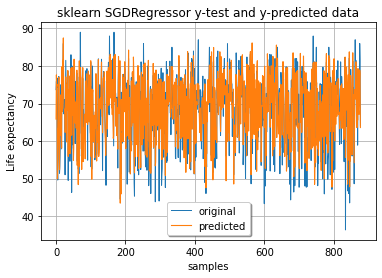

In [ ]:
#Calcule o MSE no conjunto de testes

sklearn_y_pred = sklearn_sgd_reg.predict(X_test)
sklearn_mse = mean_squared_error(y_test, sklearn_y_pred)
print("sklearn MSE: ", sklearn_mse)
print("sklearn RMSE: ", sklearn_mse**(1/2.0)) 
print('sklearn W = ', sklearn_sgd_reg.coef_)

plt.plot(y_test, linewidth=1, label="original")
plt.plot(sklearn_y_pred, linewidth=1.1, label="predicted")
plt.title("sklearn SGDRegressor y-test and y-predicted data")
plt.xlabel('samples')
plt.ylabel('Life expectancy')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)


>**Quais são as suas conclusões? (1-2 parágrafos)**

A etapa de pré-processamento dos dados é essencial para permitir a aplicação e treinamento do modelo preditivo. Alguns erros nesta etapa podem piorar a qualidade do treinamento ou mesmo inviabilizá-lo por completo. A regressão linear SGD implementada manualmente neste exercício conseguiu convergir para valores de MSE que permanecem razoavelmente próximos dos valores de MSE obtidos pelo SGDRegressor do sklearn, o que nos leva a acreditar que com o tratamento atual de features, o regressor linear implementado se comporta de maneira satisfatória, apesar de aparentemente este modelo linear não ser capaz de descrever o problema com uma precisão muito alta.
</br></br>
O erro do regressor linear está relacionado aos valores da taxa de aprendizagem e número de iterações. Caso a taxa de aprendizagem seja muito alta, ele sofre problema de overshooting e o MSE não converge para um valor mínimo, por outro lado, caso a taxa de aprendizagem seja muito baixa, ele pode requerer um número de iterações muito maior para convergir.

2. (2 points) Treine o modelo de regressão linear otimizado com Gradiente Descendente (GD) com 3 taxas de aprendizado diferentes. Compare os resultados dos modelos de GD com a solução com a equação normal (pseudo-inversa). 

## **IV) SGD com diferentes taxas de aprendizagem**

Nesta seção, aplicaremos o SGD otimizado aos datasets e observaremos seu comportamento para 3 taxas diferentes de aprendizagem, mantendo fixo o número de épocas.

In [ ]:
# TODO: Gradiente Descendente (GD) com 3 taxas de aprendizado diferentes. 

lr1 = 0.0001 #substitua por uma taxa de aprendizado válida
epochs_1 = 30 #substitua por um número máximo de iterações válido
sgd_linear_lr1 = SGDRegression(learning_rate=lr1, epochs=epochs_1)
sgd_linear_lr1.fit(X_train, y_train) #treinamento
print('Taxa de aprendizado lr1 = ', lr1)
print('lr1 W = ', sgd_linear_lr1.ws)
print('\n')

lr2 = 0.01 #substitua por uma taxa de aprendizado válida
epochs_2 = 30 #substitua por um número máximo de iterações válido
sgd_linear_lr2 = SGDRegression(learning_rate=lr2, epochs=epochs_2)
sgd_linear_lr2.fit(X_train, y_train) #treinamento
print('Taxa de aprendizado lr2 = ', lr2)
print('lr2 W = ', sgd_linear_lr2.ws)
print('\n')

lr3 = 0.1 #substitua por uma taxa de aprendizado válida
epochs_3 = 30 #substitua por um número máximo de iterações válido
sgd_linear_lr3 = SGDRegression(learning_rate=lr3, epochs=epochs_3)
sgd_linear_lr3.fit(X_train, y_train) #treinamento
print('Taxa de aprendizado lr3 = ', lr3)
print('lr3 W = ', sgd_linear_lr3.ws)

Taxa de aprendizado lr1 =  0.0001
lr1 W =  [19.28872108  4.01879089 -0.40138616 -1.01219644  5.14779683  3.17160512
  7.72711125  1.66773814  9.61835511  0.75954905  7.97020544  3.13786944
  7.98417784 -3.29093001  2.48400364  1.50327043  1.81023344  2.0867508
  8.21061664  9.66189182  9.42016125  9.24862883]


Taxa de aprendizado lr2 =  0.01
lr2 W =  [ 38.37374779  -0.2297077  -16.01126582   2.05644535   0.70321106
   0.5426212   -2.38277564  -6.9254507    4.47898956  -5.39407594
   2.59120835   0.26864105   4.34620515 -23.98236719   0.09505008
   2.22167803  -1.85578359   2.49523007   1.97269075  16.61369986
  20.47795988  18.1810853 ]


Taxa de aprendizado lr3 =  0.1
lr3 W =  [ 42.53806002  -6.58194588  -9.38039234  22.98331759  -0.57583163
   0.46619749  -4.59966206  -5.57320729   5.60890911 -28.25750911
   1.26167283  -2.04852486   2.05211931 -22.80843542  -6.392719
   3.31910558  -0.81287314   4.43726904   3.65916703  19.15065815
  23.65939137  21.50772173]


In [ ]:
# Calcule e compare o MSE no conjunto de testes para cada modelo

y_test_pred_lr1 = sgd_linear_lr1.test(X_test)
mse_for_test_lr1 = calculate_mse_for_test_predictions(y_test_pred_lr1, y_test)
print(f"O MSE para o conjunto de testes com lr1 é {mse_for_test_lr1}")

y_test_pred_lr2 = sgd_linear_lr2.test(X_test)
mse_for_test_lr2 = calculate_mse_for_test_predictions(y_test_pred_lr2, y_test)
print(f"O MSE para o conjunto de testes com lr2 é {mse_for_test_lr2}")

y_test_pred_lr3 = sgd_linear_lr3.test(X_test)
mse_for_test_lr3 = calculate_mse_for_test_predictions(y_test_pred_lr3, y_test)
print(f"O MSE para o conjunto de testes com lr3 é {mse_for_test_lr3}")

O MSE para o conjunto de testes com lr1 é 41.50374688846627
O MSE para o conjunto de testes com lr2 é 18.029299058394162
O MSE para o conjunto de testes com lr3 é 33.5867395584132


## **V) Solução analítica via equação normal**

Implementamos aqui a solução analítica do problema, que consiste na resolução literal da equação normal utilizada para obter o vetor de pesos *w*. Trata-se da equação a seguir:
$$
w = (X^TX)^{-1}X^Ty
$$
onde a expressão que acompanha o termo *y* no segundo membro da equação é conhecida como a pseudo-inversa da matriz *X*. Assumimos que a matriz *X* é **simétrica** e **positiva definida**.


In [ ]:
# TODO: Implemente aqui sua solução para regressão linear com equação normal

class NERegression():
  def __init__(self):
    self.ws = None #pesos
  
  def predict(self, X):
    # Use essa função para calcular y a partir de X e ws. 
    # Não esqueça de adicionar o bias.
    X_test_with_bias = include_a_column_for_bias(X)
    w_transposed = np.transpose(self.ws)
    y_predictions = []

    for x_test_item in X_test_with_bias:
      y_prediction_item = np.matmul(w_transposed, x_test_item)
      y_predictions.append(y_prediction_item)
    self.y_predictions = y_predictions

  def calculate_mse(self, y_real):
    losses_list = []
    for y_prediction_item, y_real_item in zip(self.y_predictions, y_real):
      losses_list.append(mse_loss(y_prediction_item, y_real_item))
    mse_array = sum(losses_list)/len(losses_list)
    mse = mse_array[0]
    return mse

  def fit(self, X, y):
    #Use essa função para calcular a matriz de pesos com a equação normal
    X_train_with_bias = include_a_column_for_bias(X)
    pseudo_inverse_of_X = np.linalg.pinv(X_train_with_bias)
    self.ws = np.matmul(pseudo_inverse_of_X, y)


In [ ]:
#TODO: Calcule o modelo de regressão linear utilizando equação normal

ne = NERegression()
ne.fit(X_train, y_train)
print("W = ", ne.ws)

W =  [[ 2.05137596e+12]
 [ 7.96849254e-01]
 [-1.59847617e+01]
 [ 1.87705372e+02]
 [ 1.50225766e+00]
 [ 6.14466653e-01]
 [-1.73162917e+00]
 [-5.31992747e+00]
 [ 4.05072739e+00]
 [-1.94281693e+02]
 [ 2.18015979e+00]
 [ 2.56800466e-01]
 [ 3.84040423e+00]
 [-2.34903214e+01]
 [-1.71511077e-01]
 [ 5.27216456e-03]
 [-1.97554287e+00]
 [ 1.75631936e+00]
 [ 2.19853699e+00]
 [ 1.59680696e+01]
 [-2.05137596e+12]
 [-2.05137596e+12]]


In [ ]:
# Calcule o MSE no conjunto de testes

ne.predict(X_test)
ne_mse = ne.calculate_mse(y_test)
print(f"O valor do MSE via equação normal no conjunto de teste é: {ne_mse}")

O valor do MSE via equação normal no conjunto de teste é: 16.882166767964062


> **Quais são as suas conclusões? (1-2 parágrafos):**


A implementação que utiliza equação normal é a que rotineiramente possui MSE mais baixo entre os regressores lineares implementados até o momento, como seria de se esperar, por ser uma solução analítica: é a solução literal de uma equação que resolve o problema (de maneira aprpoximada, obviamente). Entretanto, os melhores valores de MSE dos outros regressores estão rotineiramente próximos do valor obtido com a equação normal, o que indica que a solução por otimização proporcionada pelo SGD também é muito boa.
</br></br>
Como mencionado na questão anterior, a taxa de aprendizagem e o número de iterações é crítico para o resultado final do regressor linear. Taxas de aprendizado muito altas como utilizado no regressor **lr3** fatalmente não convergem para MSE mínimos (e pior, podem levar a casos de overshooting). Por outro lado, taxas de aprendizagem muito baixas como o **lr1** podem fazer com que o modelo demore muito para convergir, como demonstrado na comparação entre taxas com o mesmo número de iterações. Encontramos taxas razoavelmente boas para o número de iterações fixado em 30 épocas com **lr2** e a taxa utilizada pelo **sgd_linear** que obtiveram MSE's próximos da equação normal e da SGDRegressor do sklearn.

3. (2 points) Às vezes, funções mais complexas geram melhores predições. Desenvolva e avalie um modelo de regressão polinomial.



## **VI) Regressão Polinomial**
Nesta última seção, trabalharemos o problema utilizando um modelo polinomial.

In [ ]:
# TODO: Implemente aqui sua função para gerar um modelo de regressão polinomial.
#       Não utilize bibliotecas prontas como scikit-learn, Keras/TensorFlow, ou PyTorch.

# ATUALIZAÇÃO: Nesta implementação utilizaremos PolynomialFeatures como 
# autorizado pelo monitor Décio.

from sklearn.preprocessing import PolynomialFeatures

class PolyFeatures():
    def __init__(self, degree):
      self.degree = degree #grau da nova matriz X
      self.poly = PolynomialFeatures(degree=degree)

    def transform(self, X):
      #use essa função para gerar a nova matriz X
      self.X_poly = self.poly.fit_transform(X)
      return self.X_poly

In [ ]:
degree = 3 #escolha o grau da regressão polinomial
poly_feat = PolyFeatures(degree)
X_train_poly = poly_feat.transform(X_train)

In [ ]:
lr = 0.001 #substitua por uma taxa de aprendizado válida
max_iter = 30 #substitua por um número máximo de iterações válido
sgd_poly = SGDRegression(learning_rate=lr, epochs=max_iter)
sgd_poly.fit(X_train_poly, y_train) #treinamento
print('W = ', sgd_poly.ws)

W =  [10.0420591  12.16726345  0.92759391 ...  1.71083658  1.41441504
  6.11386617]


O MSE encontrado via regressão polinomial foi de 17.34382653581418


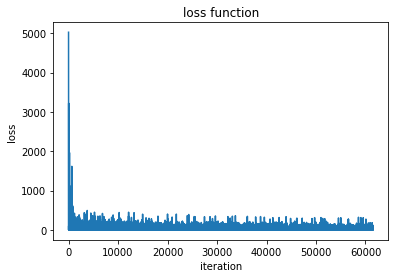

In [ ]:
#Evolução da loss ao longo do tempo
print(f"O MSE encontrado via regressão polinomial foi de {sgd_poly.history.calculate_mse()}")
sgd_poly.history.plot_loss()

In [ ]:
X_test_poly = poly_feat.transform(X_test)
y_test_pred_poly = sgd_poly.test(X_test_poly)
mse_for_test_poly = calculate_mse_for_test_predictions(y_test_pred_poly, y_test)
print(f"O erro MSE para o conjunto de testes via regressão polinomial foi de {mse_for_test_poly}")

O erro MSE para o conjunto de testes via regressão polinomial foi de 12.126263209706485



 > **Quais as suas conclusões?(1-2 parágrafos):**

 


O MSE para o conjunto de treinamento da regressão polinomial, utilizando um polinômio de grau 3, manteve-se consistentemente abaixo dos valores de todos os outros modelos de regressão linear implementados, o que pode indicar que este problema pode ser melhor descrito por um modelo polinomial mais complexo do que os modelos lineares mais simples implementados inicialmente.
</br></br>
O tamanho da matriz de features gerada para modelos polinomiais mais complexos cresce de maneira muito rápida se comparada com os modelos lineares que manterão seu tamanho constante, o que pode exigir recursos computacionais mais intensos, sem contar que modelos excessivamente complexos para o dataset em questão pode levá-lo a sofrer overfiting.

4. (1 point) Avalie os gráficos da função de custo vs. número de iterações no conjunto de treino. Quais conclusões você pode chegar a respeito dos modelos de GD ao analisar os gráficos?

Função de custo vs. nº de iterações GD linear


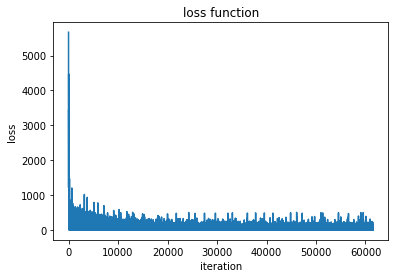

In [ ]:
print('Função de custo vs. nº de iterações GD linear')
sgd_linear.history.plot_loss()

Função de custo vs. nº de iterações GD linear com taxa de aprendizado =   0.0001


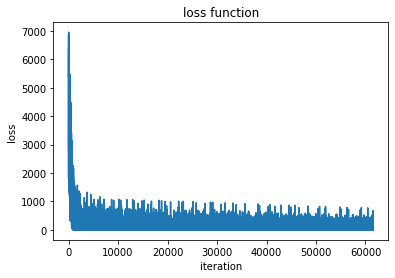

In [ ]:
print('Função de custo vs. nº de iterações GD linear com taxa de aprendizado =  ', lr1)
sgd_linear_lr1.history.plot_loss()

Função de custo vs. nº de iterações GD linear com taxa de aprendizado =   0.01


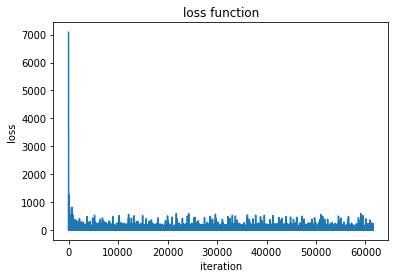

In [ ]:
print('Função de custo vs. nº de iterações GD linear com taxa de aprendizado =  ', lr2)
sgd_linear_lr2.history.plot_loss()

Função de custo vs. nº de iterações GD linear com taxa de aprendizado =   0.1


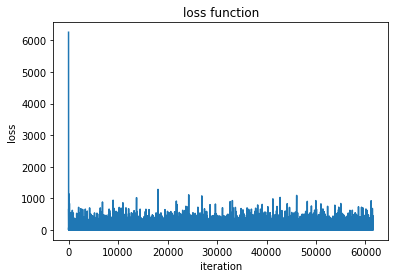

In [ ]:
print('Função de custo vs. nº de iterações GD linear com taxa de aprendizado =  ', lr3)
sgd_linear_lr3.history.plot_loss()

Função de custo vs. nº de iterações GD Polinomial


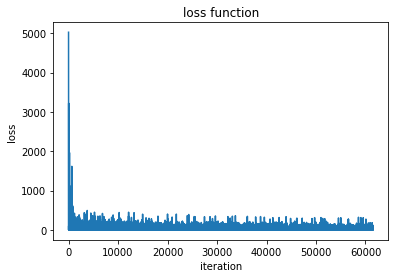

In [ ]:
print('Função de custo vs. nº de iterações GD Polinomial')
sgd_poly.history.plot_loss()

> **Escreva aqui suas conclusões (2-4 parágrafos)**


Ao analisar o comportamento da função custo no tempo (número de iterações), o que salta aos olhos, de início, é a grande variabilidade que ela apresenta. A descida do erro MSE não é feita de forma suave, de modo que a função apresenta picos muito elevados e muito baixos. Isso já era de se esperar, dada a implementação escolhida para o gradiente descendente: como se trata do modelo estocástico, cada ponto é escolhido de forma aleatória, causando uma variabilidade maior nas perdas, pois ora pode ser muito pequena, ora bem maior dependendo da localização do datapoint.


Percebemos também que após um certo número de iterações (que se reflete também no número de épocas), o valor da perda se estabiliza e não apresenta melhoras a partir daí. Não avaliamos os modelos para um número exorbitante de épocas, porém fica um *disclaimer* de que isso poderia ter causado sérios problemas (fazer com que o modelo treinado fique especializado demais para o conjunto de treinamento, perdendo sua capacidade de generalizar para dados fora desse conjunto - ou seja, um caso de overfiting).

Quanto às taxas de aprendizado, averiguamos aquilo que já vimos anteriormente: dependendo de seu valor (combinado ao número de épocas), ajuda o modelo a convergir mais rapidamente, e afeta também a variabilidade da função custo.

De modo geral, o que concluímos é que todos os métodos conduziram a modelos razoavelmente satisfatórios para o problema: todos convergiram e não foram vistos exageros para os erros MSE encontrados (quando seus parâmetros são ajustados de forma adequada, é claro). Para melhorias futuras, podemos incluir aqui o estudo de novas combinações para a regressão polinomial e fazer um data-split no conjunto de treinamento, separando uma parte deste para validação, na tentativa de conseguir calibrar ainda mais o vetor de pesos para que o modelo consiga generalizar bem. Além disso, uma análise sistemátca dos outliers também é uma boa opção.

## Prazo: 24 de Abril, Domingo, 23:59

Política de penalidade para submissões atrasadas: Você não está sendo encorajada(o) a submeter o trabalho depois da data de submissão. Entretanto, caso isso aconteça, a nota será penalizada da seguinte forma:

- 25 de Abril 23:59 : nota * 0.75
- 26 de Abril 23:59 : nota * 0.5
- 27 de Abril 23:59 : nota * 0.25


## Submissão
- Submita seu notebook no Google Classroom. (Em português ou inglês).

- Apenas UMA pessoa da dupla precisa enviar o notebook.

- Não esqueça de colocar seus respectivos nomes & RAs.

- **Esta atividade NÃO é individual, deve ser realizada em dupla.**